# Linear Algebra for QC Intro 1

&copy; 2024 by [Damir Cavar](http://damir.cavar.me/)

**Sources:**

- [Quantum Computation Primer - Part 1](https://www.codeproject.com/Articles/5155638/Quantum-Computation-Primer-Part-1)
- [Conjugate transpose (Wikipedia)](https://en.wikipedia.org/wiki/Conjugate_transpose)

In [1]:
import numpy as np

## Matrix Multiplication

### Matrix Product

In [37]:
A = np.array([[1, 3, 2], [0, 2, 6]])
print("Matrix A:\n", A)

Matrix A:
 [[1 3 2]
 [0 2 6]]


In [38]:
B = np.array([[2, 0, 1, 4], [3, 1, 3, 1], [1, 2, 2, 6]])
print("Matrix B:\n", B)

Matrix B:
 [[2 0 1 4]
 [3 1 3 1]
 [1 2 2 6]]


In [39]:
print("Matrix product:")
A @ B

Matrix product:


array([[13,  7, 14, 19],
       [12, 14, 18, 38]])

### Matrix Scalar Product

In [42]:
C = 2 * A
print("Matrix C:\n", C)

Matrix C:
 [[ 2  6  4]
 [ 0  4 12]]


## Dirac Notation

In [43]:
from qiskit.quantum_info import Statevector

In [55]:
ASV = Statevector([0, 1])
ASV.draw(output="latex")

<IPython.core.display.Latex object>

Or in markdown: $| 1 \rangle$ or $| \downarrow \rangle$ or **ket one**

This is also spin-down:

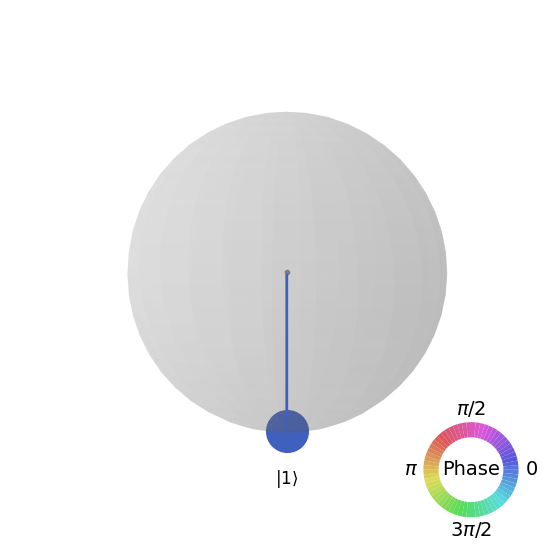

In [56]:
ASV.draw(output="qsphere")

In [57]:
BSV = Statevector([1, 0])
BSV.draw(output="latex")

<IPython.core.display.Latex object>

Or in markdown: $| 0 \rangle$ or $| \uparrow \rangle$ or **ket zero**

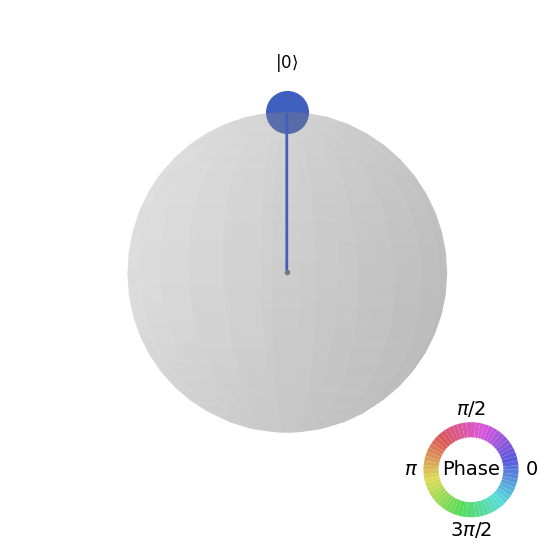

In [58]:
BSV.draw(output="qsphere")

In [61]:
CSV = BSV.tensor(ASV.tensor(BSV))
CSV.draw(output="latex")

<IPython.core.display.Latex object>

The ket zero one zero is a tensor product of ket zero, ket one, and ket zero, as in $|0 \rangle \otimes |1 \rangle \otimes |0 \rangle$.

![Ket to binary](./KetBinary.png)

#### Numpy Tensor Product

axes = 0 : tensor product

In [64]:
A = np.array([ 1, 2 ])
B = np.array([ 1, 2 ])
np.tensordot(A, B, axes=0)

array([[1, 2],
       [2, 4]])

In [63]:
A = np.array([[1,3], [4,2]])
B = np.array([[2,1], [5,4]])
np.tensordot(A, B, axes=0)

array([[[[ 2,  1],
         [ 5,  4]],

        [[ 6,  3],
         [15, 12]]],


       [[[ 8,  4],
         [20, 16]],

        [[ 4,  2],
         [10,  8]]]])

#### Bra and Ket

A **bra zero** like $\langle 0|$ is the conjugate transpose of the **ket zero** $|0 \rangle$ which includes the steps:

- transposing the matrix
- apply complex conjugation to each element in the matrix

The complex conjugate of $a + i b$ is $a − i b$, for real numbers $a$ and $b$.

Example matrix $A$:

![Example matrix A](./example_matrix_a.svg)

Transposed to:

![Transposed matrix A](./transposed_matrix_a.svg)

Applying complex conjugation to each element:

![Conjugate matrix A](./conjugate_matrix_a.svg)

The process is reversible, i.e., to get the bra from the ket calculate the conjugate transpose.

The **bra-ket $\langle a|b \rangle$** is the inner or dot product $a \cdot b$, as in: $a_1 b_1 + a_2 b_2 + \dots + a_n b_n$.

The **ket-bra** $|a \rangle\langle b|$ is the outer product of $a$ and $b$:

$|a \rangle\langle b| = \begin{bmatrix}
a_1b_1 & a_1b_2 & \cdots & a_1b_n\\
a_2b_1 & a_2b_2 & \cdots & a_2b_n\\
\vdots & \vdots & \ddots & \vdots \\
a_nb_1 & a_nb_2 & \cdots & a_nb_n
\end{bmatrix}$



# Multiplication with Complex Numbers

In [69]:
x = 2
y = 1
z = complex(x, y)
z

(2+1j)

In [70]:
print(np.real(z))
print(np.imag(z))

2.0
1.0


In [72]:
r = complex(2, 3)
r

(2+3j)

In [73]:
r * z

(1+8j)

To compute this manually:

$(x_1 + y_1i) (x_2 + y_2i) = x_1 x_2 + x_1 y_2 i + y_1 x_2 i + y_1 y_2 (i)^2$

With $i^2 = -1$ thus:

$(x_1 + y_1i) (x_2 + y_2i) = x_1 x_2 + x_1 y_2 i + y_1 x_2 i - y_1 y_2$

and:

$(x_1 + y_1i) (x_2 + y_2i) = (x_1 x_2 - y_1 y_2) + (x_1 y_2 + y_1 x_2) i$



In [79]:
x = complex((z.real * r.real) - (z.imag * r.imag), (z.real * r.imag) + (z.imag * r.real))
x

(1+8j)

## Quantum Superposition

Configuration of qubits determines whether it collapses to either $0$ or $1$ when measured.

Placing a qubit into a superposition one can change the probability of a qubit collapsing to a particular value.

Qubits with pure basis states:

- $|0 \rangle$ has 100\% chance of collapsing to $0$
- $|1 \rangle$ has 100\% chance of collapsing to $1$

Qubit in general:

- $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ with $\alpha$ and $\beta$ coefficients as complex amplitudes or probability amplitudes given a quantum state to be a wave.

Probability amplitudes can be manipulated but their values cannot be directly observed.

Qubit in superposition with equal probability of observing $0$ or $1$:

- $|\psi\rangle = \frac{1}{\sqrt{2}}|0\rangle + \frac{1}{\sqrt{2}}|1\rangle$

Definitions:

- One or more qubits make up a **quantum system**
- A quantum system has an **overall quantum state** at any one time
- The quantum system has a set of distinct states that it may collapse to when measured, called **observable states**
